<a href="https://colab.research.google.com/github/HelenLit/horses-or-humans_CNN/blob/main/horses_or_humans_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the compressed dataset `horse-or-human.zip`.

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-08-18 19:23:48--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   131MB/s    in 1.1s    

2023-08-18 19:23:49 (131 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [4]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory `./horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.


ImageDataGenerator API is coded to automatically label images according to the directory names and structure

In [5]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

See what the filenames look like in the horses and humans training directories:

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse49-2.png', 'horse47-6.png', 'horse44-6.png', 'horse22-5.png', 'horse48-9.png', 'horse39-6.png', 'horse11-7.png', 'horse25-6.png', 'horse44-0.png', 'horse13-9.png']
['human10-27.png', 'human03-25.png', 'human09-28.png', 'human09-13.png', 'human07-10.png', 'human15-28.png', 'human09-12.png', 'human15-16.png', 'human07-28.png', 'human14-25.png']


Total number of horse and human images in the directories:

In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

#total training horse images: 500
#total training human images: 527

total training horse images: 500
total training human images: 527


Configure the matplotlib parameters:

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now take a look at a few pictures to get a better sense of what they look like (batch of 8 horse and 8 human pictures):

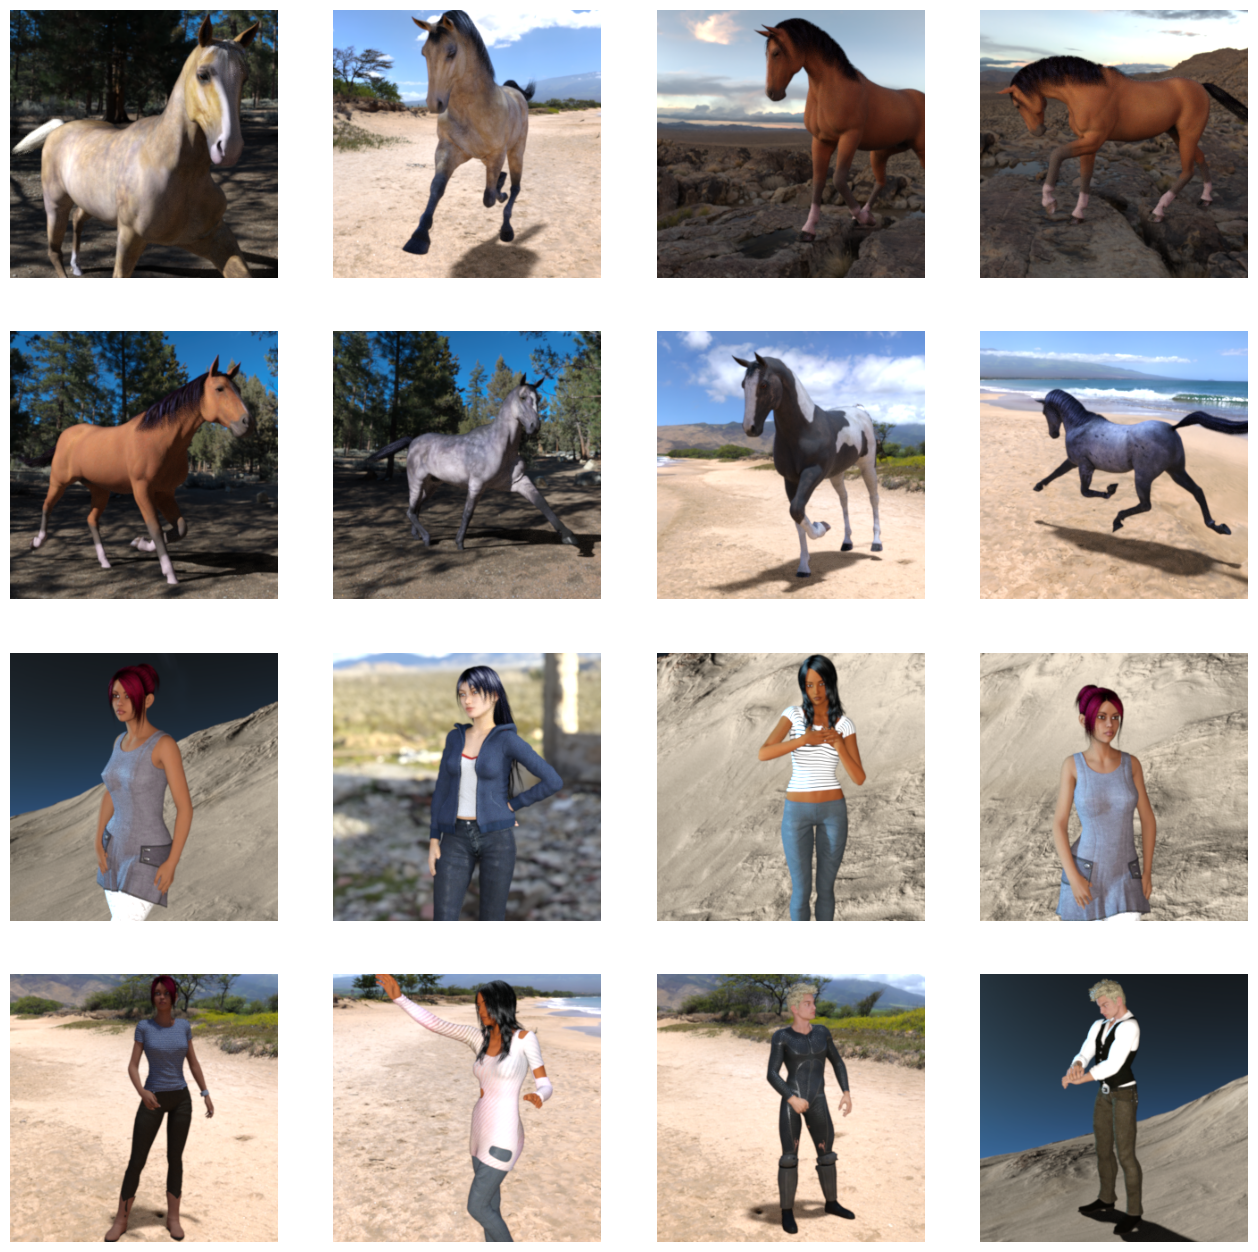

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Building a Small Model from Scratch:

In [7]:
import tensorflow as tf

Then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.
Because this is a two-class classification problem, i.e. a binary classification problem, I end my network with a sigmoid activation. This makes the output value of my network a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [8]:
model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

 Review the network architecture and the output shapes

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

 Configure the specifications for model training:

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. There is one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

#Epoch 15/15
#8/8 [==============================] - 8s 1s/step - loss: 0.0870 - accuracy: 0.9666


Found 1027 images belonging to 2 classes.


 Training for 15 epochs:

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 23s 877ms/step - loss: 1.1838 - accuracy: 0.5873
Epoch 2/15
8/8 [==============================] - 8s 951ms/step - loss: 0.6824 - accuracy: 0.6452
Epoch 3/15
8/8 [==============================] - 8s 944ms/step - loss: 0.7419 - accuracy: 0.6518
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.5762 - accuracy: 0.7441
Epoch 5/15
8/8 [==============================] - 7s 1s/step - loss: 0.7730 - accuracy: 0.7453
Epoch 6/15
8/8 [==============================] - 8s 993ms/step - loss: 0.3937 - accuracy: 0.8387
Epoch 7/15
8/8 [==============================] - 8s 959ms/step - loss: 0.4018 - accuracy: 0.8387
Epoch 8/15
8/8 [==============================] - 7s 848ms/step - loss: 0.4139 - accuracy: 0.8476
Epoch 9/15
8/8 [==============================] - 7s 837ms/step - loss: 0.2138 - accuracy: 0.9121
Epoch 10/15
8/8 [==============================] - 8s 945ms/step - loss: 0.3563 - accuracy: 0.8632
Epoch 11/15
8/8 [=======

**Model Prediction**
This code allows  to choose 1 or more files from file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [12]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving завантаження (1).jpg to завантаження (1).jpg
1/1 [==============================] - 1s 541ms/step
[0.98931783]
завантаження (1).jpg is a human


Visualizing Intermediate Representations:

In [13]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

1/1 [==============================] - 0s 115ms/step


<ipython-input-13-3501e75cf878>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


NameError: ignored

Clean Up
Following code allows to terminate the kernel and free memory resources

In [ ]:
from google.colab import runtime
runtime.unassign()